In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1 Step:- Read the the datasets 
# 2 Step:- Data Preparation --> EDA / FE -- clean data etc
# 3 Step:- Divide the data into X and Y
# 4 Step:- Train Test Split
# 5 Step:- Scaling
# 6 Step:- Model Training 
# 7 Step:- Model Evaluation 

In [4]:
# 1 Step:- Read the the datasets 
from sklearn.datasets import load_diabetes

In [8]:
diabetes = load_diabetes()

In [9]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
# this dataset is in key and value pair
# So I will check the  keys of this datasets

In [12]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [13]:
# Now  - Try to understand what  is this dataset all about Because the first step is 
#        understand the data and the problem statements

In [15]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
# Problem Statement :-  To predict disease progression one year after baseline

In [18]:
#  now the See the data
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [20]:
# and what is my target 
diabetes.target # ---- it given me what is the  amount of disease progression 

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [21]:
# now i am going to see the features name
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
# Now i am going to covert this into dataframe
data=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [25]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [26]:
# now i  missing one thing that In this data i  do'nt have target variable 

In [27]:
data['target']= diabetes.target

In [28]:
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [32]:
# 2 Step:- Data Preparation --> EDA / FE -- clean data etc
# But this data is already prepared so focus on next step

In [33]:
# 3 Step:- Divide the data into X and Y.

In [34]:
# Since In Simple linear regression -- take only one feature so--
x=data[['bmi']]
y=data[['target']]

In [35]:
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [36]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [38]:
# 4 Step:- Train Test Split -- Split arrays or matrices into random train and test subsets.

# ----> for this you have a library -->
# sklearn.model_selection 

In [39]:
from sklearn.model_selection import train_test_split

In [50]:

X_train, X_test , Y_train, Y_test = train_test_split(x,y,test_size=0.20,random_state=111)
# to reproduce the result what can you do --> random State
X_train

,bmi
382,0.060618
195,0.025051
391,-0.069797
117,-0.021295
337,-0.012673
...,...
275,-0.011595
86,-0.075186
212,0.003494
364,-0.006206


In [51]:
Y_train

,target
382,132.0
195,122.0
391,63.0
117,281.0
337,91.0
...,...
275,94.0
86,55.0
212,73.0
364,262.0


In [53]:
# 5 Step:- Scaling -> Scaling is also done in this dataset

In [54]:
# 6 Step:- Model Training

In [55]:
from sklearn.linear_model import LinearRegression

In [57]:
# In ML
# fit --> training the model --> it will done in X_train
# predict --> Predicting on the data  --> It can both 

In [59]:
model=LinearRegression()

In [60]:
model

LinearRegression()

In [61]:
# Now train the model
model.fit(X_train,Y_train)

LinearRegression()

In [62]:
model.coef_ # It  is my  m 

array([[967.56370916]])

In [63]:
model.intercept_ # It Is my c

array([150.90412145])

In [65]:
Y_Predication =model.predict(X_test)

In [66]:
Y_Predication

array([[275.25594645],
       [114.65676186],
       [145.9423173 ],
       [176.18502089],
       [164.71365056],
       [150.11372469],
       [157.41368763],
       [122.99957664],
       [155.32798393],
       [128.21383588],
       [180.35642828],
       [143.8566136 ],
       [240.84183547],
       [202.25631709],
       [133.42809512],
       [191.82779861],
       [131.34239143],
       [146.98516915],
       [194.95635416],
       [164.71365056],
       [134.47094697],
       [143.8566136 ],
       [119.8710211 ],
       [182.44213198],
       [ 88.58546566],
       [132.38524328],
       [ 86.49976196],
       [111.52820632],
       [173.05646535],
       [178.27072459],
       [199.12776155],
       [115.69961371],
       [127.17098404],
       [208.51342818],
       [133.42809512],
       [138.64235436],
       [121.9567248 ],
       [120.91387295],
       [159.49939132],
       [145.9423173 ],
       [185.57068752],
       [217.89909481],
       [127.17098404],
       [144

In [67]:
# Visualised the result

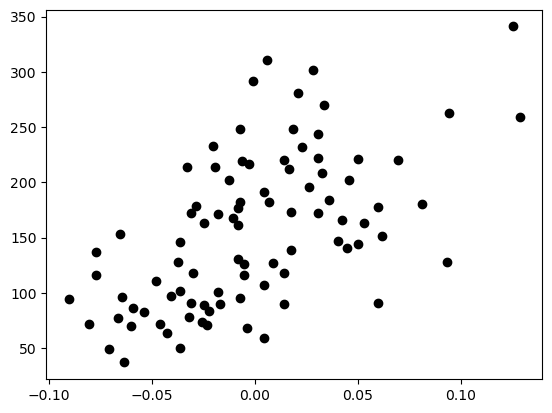

In [68]:
plt.scatter(X_test,Y_test,color = 'black',label="Actual Data")


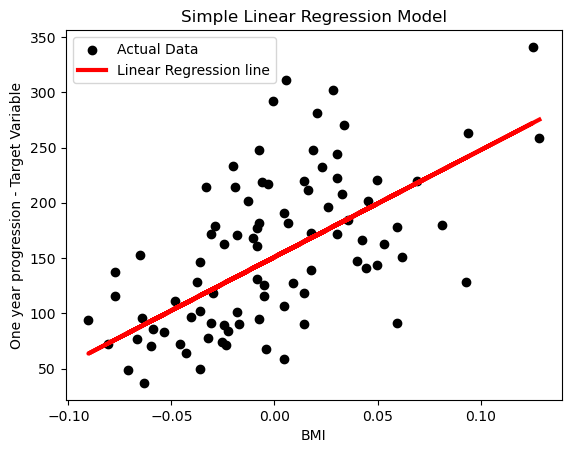

In [71]:
plt.scatter(X_test,Y_test,color = 'black',label="Actual Data")
plt.plot(X_test,Y_Predication,color='red',linewidth=3,label="Linear Regression line")
plt.xlabel("BMI")
plt.ylabel("One year progression - Target Variable")
plt.title("Simple Linear Regression Model")
plt.legend()
plt.show()